# Get weather data

In [8]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Open-Meteo API client setup
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Select zurich weather data in the timeframe of our participants 
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 47.3667,
	"longitude": 8.55,
	"start_date": "2021-01-08",
	"end_date": "2021-11-30",
	"hourly": ["temperature_2m", "relative_humidity_2m", "precipitation", "surface_pressure", "cloud_cover", "wind_speed_10m"],
	"daily": ["weather_code", "temperature_2m_max", "temperature_2m_min", "temperature_2m_mean", "sunrise", "sunset", "daylight_duration", "sunshine_duration", "precipitation_sum", "wind_speed_10m_max"],
	"timezone": "Europe/Berlin"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location (ignore additional locations / models that have been fetched)
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_relative_humidity_2m = hourly.Variables(1).ValuesAsNumpy()
hourly_precipitation = hourly.Variables(2).ValuesAsNumpy()
hourly_surface_pressure = hourly.Variables(3).ValuesAsNumpy()
hourly_cloud_cover = hourly.Variables(4).ValuesAsNumpy()
hourly_wind_speed_10m = hourly.Variables(5).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["relative_humidity_2m"] = hourly_relative_humidity_2m
hourly_data["precipitation"] = hourly_precipitation
hourly_data["surface_pressure"] = hourly_surface_pressure
hourly_data["cloud_cover"] = hourly_cloud_cover
hourly_data["wind_speed_10m"] = hourly_wind_speed_10m

hourly_dataframe = pd.DataFrame(data = hourly_data)
hourly_dataframe


Coordinates 47.34621810913086°N 8.54337215423584°E
Elevation 442.0 m asl
Timezone b'Europe/Berlin' b'CEST'
Timezone difference to GMT+0 7200 s


,date,temperature_2m,relative_humidity_2m,precipitation,surface_pressure,cloud_cover,wind_speed_10m
0,2021-01-07 22:00:00+00:00,-3.5225,98.148712,0.0,961.706482,89.099998,5.154416
1,2021-01-07 23:00:00+00:00,-3.1225,98.154823,0.0,961.879944,90.000000,4.452954
2,2021-01-08 00:00:00+00:00,-2.4725,98.895203,0.0,962.102417,84.000000,7.491114
3,2021-01-08 01:00:00+00:00,-0.9225,98.187912,0.0,962.404907,52.500000,4.843305
4,2021-01-08 02:00:00+00:00,-1.8225,98.537201,0.0,962.418945,38.699997,4.610250
...,...,...,...,...,...,...,...
7843,2021-11-30 17:00:00+00:00,2.5775,77.715958,0.9,966.295410,100.000000,21.093050
7844,2021-11-30 18:00:00+00:00,2.6775,82.391701,0.8,966.219666,100.000000,18.472595
7845,2021-11-30 19:00:00+00:00,3.0275,85.159325,0.6,966.096558,100.000000,17.595861
7846,2021-11-30 20:00:00+00:00,3.3775,85.198357,0.6,965.973328,100.000000,17.873556


In [9]:
# Process daily data
daily = response.Daily()
daily_weather_code = daily.Variables(0).ValuesAsNumpy()
daily_temperature_2m_max = daily.Variables(1).ValuesAsNumpy()
daily_temperature_2m_min = daily.Variables(2).ValuesAsNumpy()
daily_temperature_2m_mean = daily.Variables(3).ValuesAsNumpy()
daily_sunrise = daily.Variables(4).ValuesAsNumpy()
daily_sunset = daily.Variables(5).ValuesAsNumpy()
daily_daylight_duration = daily.Variables(6).ValuesAsNumpy()
daily_sunshine_duration = daily.Variables(7).ValuesAsNumpy()
daily_precipitation_sum = daily.Variables(8).ValuesAsNumpy()
daily_wind_speed_10m_max = daily.Variables(9).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
	end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}
daily_data["weather_code"] = daily_weather_code
daily_data["temperature_2m_max"] = daily_temperature_2m_max
daily_data["temperature_2m_min"] = daily_temperature_2m_min
daily_data["temperature_2m_mean"] = daily_temperature_2m_mean
daily_data["sunrise"] = daily_sunrise
daily_data["sunset"] = daily_sunset
daily_data["daylight_duration"] = daily_daylight_duration
daily_data["sunshine_duration"] = daily_sunshine_duration
daily_data["precipitation_sum"] = daily_precipitation_sum
daily_data["wind_speed_10m_max"] = daily_wind_speed_10m_max

daily_dataframe = pd.DataFrame(data = daily_data)
daily_dataframe

,date,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,sunrise,sunset,daylight_duration,sunshine_duration,precipitation_sum,wind_speed_10m_max
0,2021-01-07 22:00:00+00:00,3.0,1.7775,-3.5225,-1.185000,0,0,31297.433594,25525.607422,0.000000,7.517021
1,2021-01-08 22:00:00+00:00,3.0,0.8275,-5.3225,-2.507917,0,0,31389.322266,19588.705078,0.000000,16.641972
2,2021-01-09 22:00:00+00:00,3.0,-0.7725,-4.3225,-2.645416,0,0,31486.535156,21132.386719,0.000000,15.379206
3,2021-01-10 22:00:00+00:00,3.0,-1.7225,-4.6725,-3.212083,0,0,31588.841797,24357.156250,0.000000,9.339208
4,2021-01-11 22:00:00+00:00,73.0,2.5275,-4.5225,-0.076667,0,0,31696.013672,0.000000,8.900001,22.366402
...,...,...,...,...,...,...,...,...,...,...,...
322,2021-11-25 22:00:00+00:00,73.0,1.7275,0.6275,1.052500,0,0,32071.185547,0.000000,4.100000,12.074766
323,2021-11-26 22:00:00+00:00,75.0,5.1775,-0.3725,1.829583,0,0,31954.289062,14053.246094,3.900000,12.240000
324,2021-11-27 22:00:00+00:00,73.0,3.4275,-0.4725,1.283750,0,0,31840.566406,24892.726562,2.700000,12.429127
325,2021-11-28 22:00:00+00:00,73.0,1.6775,-0.8225,0.321250,0,0,31730.181641,12957.811523,3.800000,13.854155


## Persist Data to CSV

In [5]:
hourly_dataframe.to_csv('zurich_weather_hourly.csv', index=False)

In [6]:
daily_dataframe.to_csv('zurich_weather_daily.csv', index=False)

# Plot weather data

## Hourly Weather Data

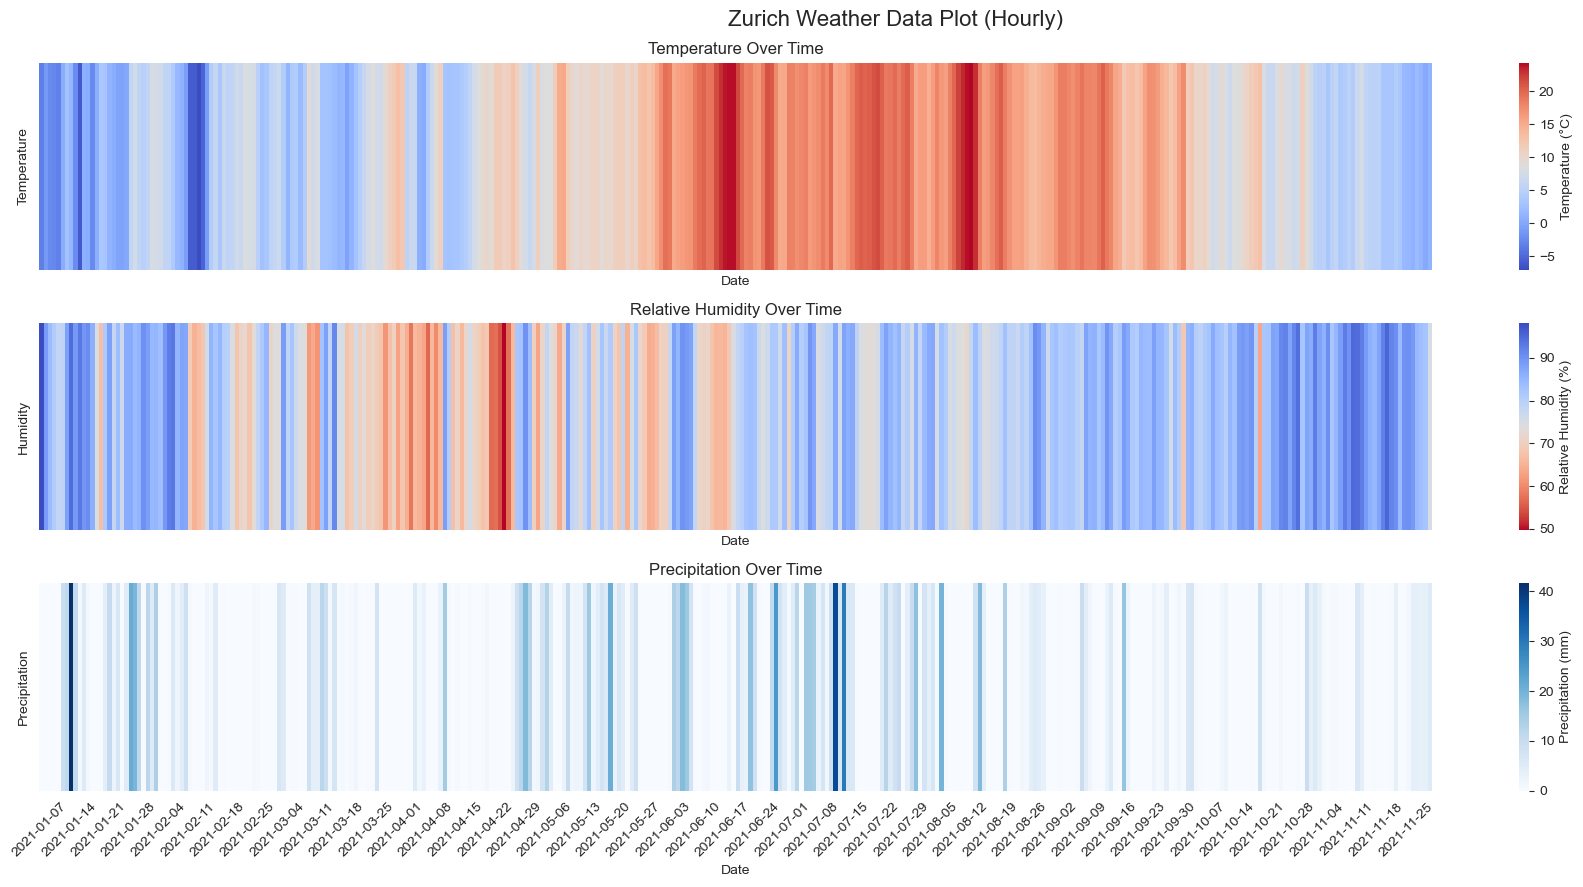

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
weather_df = pd.read_csv('zurich_weather_hourly.csv')

# Convert the 'date' column to datetime
weather_df['date'] = pd.to_datetime(weather_df['date'])

# Extract the day from the date
weather_df['day'] = weather_df['date'].dt.date

# Aggregate data to daily values
daily_weather = weather_df.groupby('day').agg({
    'temperature_2m': 'mean',
    'relative_humidity_2m': 'mean',
    'precipitation': 'sum',
    'surface_pressure': 'mean',
    'cloud_cover': 'mean',
    'wind_speed_10m': 'mean'
}).reset_index()

# Rename columns for better readability in the plot
daily_weather.rename(columns={
    'temperature_2m': 'Temperature',
    'relative_humidity_2m': 'Humidity',  # Assuming relative humidity as a proxy for sunlight
    'precipitation': 'Precipitation'
}, inplace=True)

# Set the date as the index for plotting
daily_weather.set_index('day', inplace=True)

# Plotting
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(18, 9), sharex=True)

# Temperature heatmap
sns.heatmap(daily_weather[['Temperature']].T, cmap='coolwarm', ax=axs[0], cbar_kws={'label': 'Temperature (°C)'})
axs[0].set_title('Temperature Over Time')

# Sunlight heatmap
sns.heatmap(daily_weather[['Humidity']].T, cmap='coolwarm_r', ax=axs[1], cbar_kws={'label': 'Relative Humidity (%)'})
axs[1].set_title('Relative Humidity Over Time')

# Precipitation heatmap
sns.heatmap(daily_weather[['Precipitation']].T, cmap='Blues', ax=axs[2], cbar_kws={'label': 'Precipitation (mm)'})
axs[2].set_title('Precipitation Over Time')

# Customize the plot
for ax in axs:
    ax.set_xlabel('Date')
    ax.set_ylabel('')
    # Set x-ticks every 7 days
    ax.set_xticks(range(0, len(daily_weather.index), 7))
    ax.set_xticklabels(daily_weather.index[::7], rotation=45)


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Daily Weather Data

/var/folders/d2/nvh7lrhj43bc5s3mjjwk4kxm0000gn/T/ipykernel_70471/2424516702.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['sunshine_duration'] = plot_data['sunshine_duration'] / 3600
/var/folders/d2/nvh7lrhj43bc5s3mjjwk4kxm0000gn/T/ipykernel_70471/2424516702.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data.rename(columns={


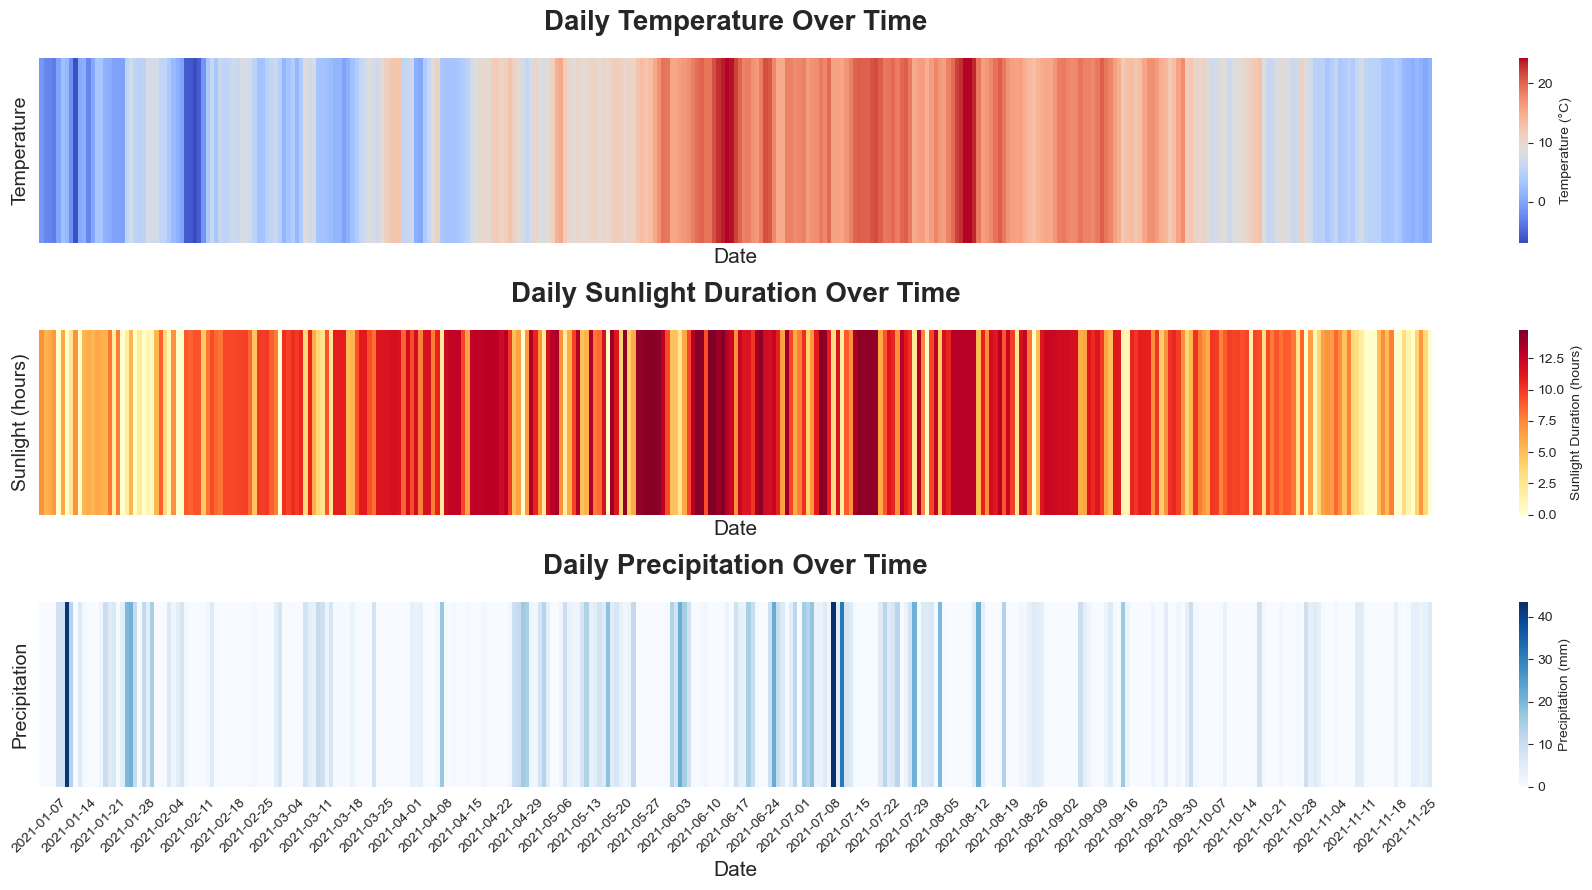

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the daily weather CSV file
weather_df = pd.read_csv('zurich_weather_daily.csv')

# Convert the 'date' column to datetime
weather_df['date'] = pd.to_datetime(weather_df['date'])

# Set the date as the index for plotting
weather_df.set_index('date', inplace=True)

# Select only the required columns
plot_data = weather_df[['temperature_2m_mean', 'sunshine_duration', 'precipitation_sum']]

# Convert sunshine_duration from seconds to hours
plot_data['sunshine_duration'] = plot_data['sunshine_duration'] / 3600

# Rename columns for better readability in the plot
plot_data.rename(columns={
    'temperature_2m_mean': 'Temperature',
    'sunshine_duration': 'Sunlight (hours)',
    'precipitation_sum': 'Precipitation'
}, inplace=True)

# Plotting
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(18, 9), sharex=True)

# Temperature heatmap
sns.heatmap(plot_data[['Temperature']].T, cmap='coolwarm', ax=axs[0], cbar_kws={'label': 'Temperature (°C)'})
axs[0].set_title('Daily Temperature Over Time', fontsize=20, weight='bold', pad=20)

# Sunlight heatmap
sns.heatmap(plot_data[['Sunlight (hours)']].T, cmap='YlOrRd', ax=axs[1], cbar_kws={'label': 'Sunlight Duration (hours)'})
axs[1].set_title('Daily Sunlight Duration Over Time', fontsize=20, weight='bold', pad=20)
# Precipitation heatmap
sns.heatmap(plot_data[['Precipitation']].T, cmap='Blues', ax=axs[2], cbar_kws={'label': 'Precipitation (mm)'})
axs[2].set_title('Daily Precipitation Over Time', fontsize=20, weight='bold', pad=20)

# Customize the plot
for ax in axs:
    ax.set_xlabel('Date', fontsize=15)
    ax.set_ylabel('', fontsize=15)
    # Set x-ticks every 7 days
    ax.set_xticks(range(0, len(plot_data.index), 7))
    ax.set_xticklabels(plot_data.index[::7].strftime('%Y-%m-%d'), rotation=45, fontsize=10)
    ax.tick_params(axis='y', labelsize=14)  # Increase the y-axis tick labels size

plt.tight_layout()
plt.show()


/var/folders/d2/nvh7lrhj43bc5s3mjjwk4kxm0000gn/T/ipykernel_70471/1292795335.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['sunshine_duration'] = plot_data['sunshine_duration'] / 3600
/var/folders/d2/nvh7lrhj43bc5s3mjjwk4kxm0000gn/T/ipykernel_70471/1292795335.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data.rename(columns={


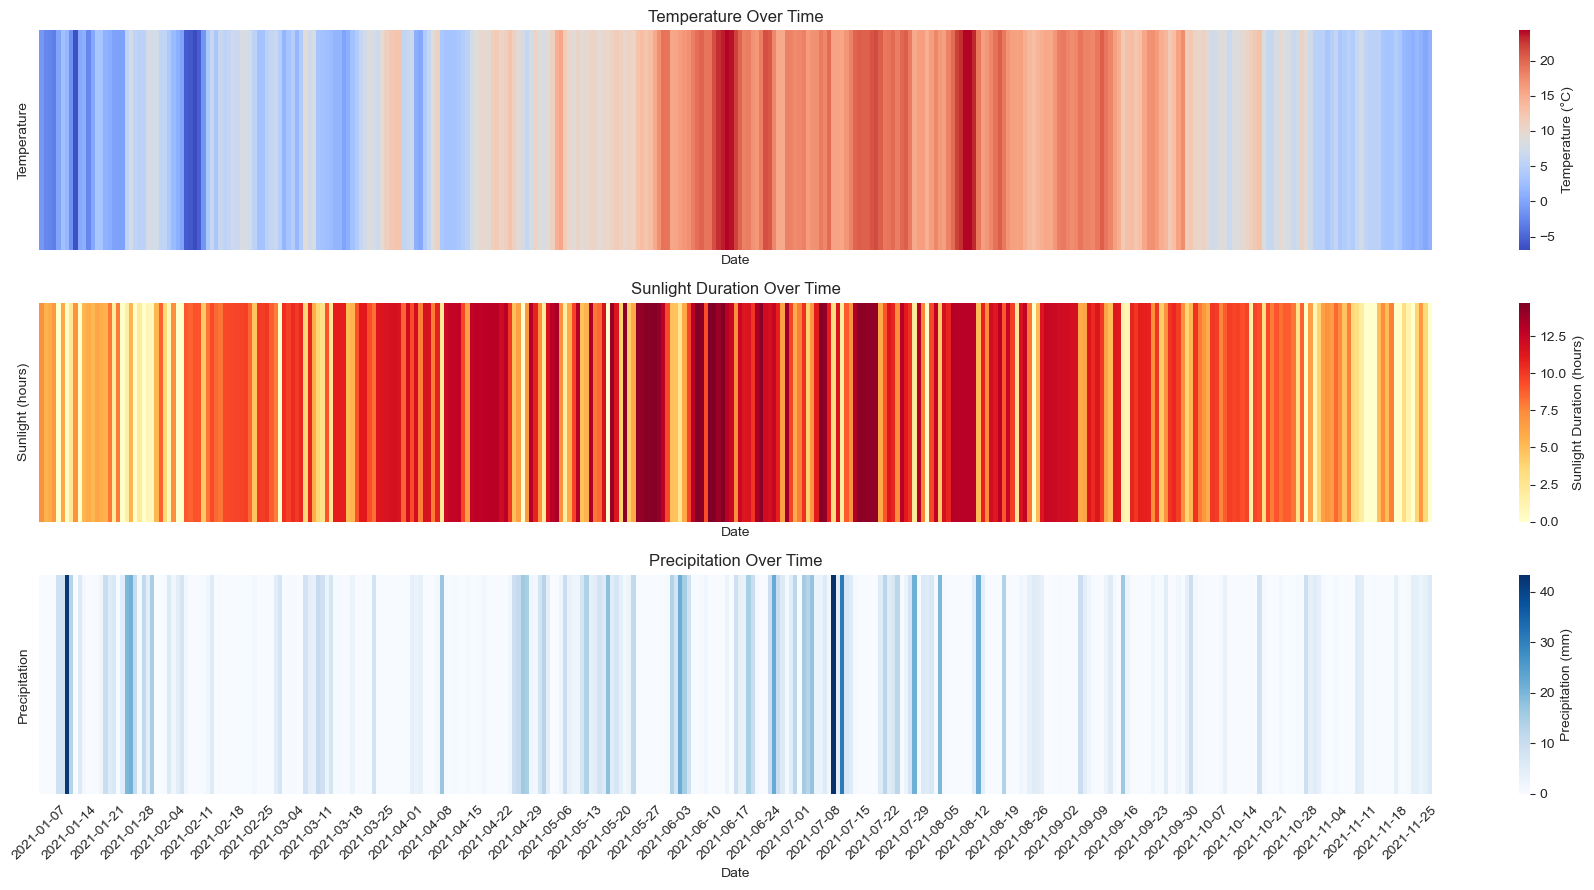

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the daily weather CSV file
weather_df = pd.read_csv('zurich_weather_daily.csv')

# Convert the 'date' column to datetime
weather_df['date'] = pd.to_datetime(weather_df['date'])

# Set the date as the index for plotting
weather_df.set_index('date', inplace=True)

# Select only the required columns
plot_data = weather_df[['temperature_2m_mean', 'sunshine_duration', 'precipitation_sum']]

# Convert sunshine_duration from seconds to hours
plot_data['sunshine_duration'] = plot_data['sunshine_duration'] / 3600

# Rename columns for better readability in the plot
plot_data.rename(columns={
    'temperature_2m_mean': 'Temperature',
    'sunshine_duration': 'Sunlight (hours)',
    'precipitation_sum': 'Precipitation'
}, inplace=True)

# Plotting
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(18, 9), sharex=True)

# Temperature heatmap
sns.heatmap(plot_data[['Temperature']].T, cmap='coolwarm', ax=axs[0], cbar_kws={'label': 'Temperature (°C)'})
axs[0].set_title('Temperature Over Time')

# Sunlight heatmap
sns.heatmap(plot_data[['Sunlight (hours)']].T, cmap='YlOrRd', ax=axs[1], cbar_kws={'label': 'Sunlight Duration (hours)'})
axs[1].set_title('Sunlight Duration Over Time')

# Precipitation heatmap
sns.heatmap(plot_data[['Precipitation']].T, cmap='Blues', ax=axs[2], cbar_kws={'label': 'Precipitation (mm)'})
axs[2].set_title('Precipitation Over Time')

# Customize the plot
for ax in axs:
    ax.set_xlabel('Date')
    ax.set_ylabel('')
    # Set x-ticks every 7 days
    ax.set_xticks(range(0, len(plot_data.index), 7))
    ax.set_xticklabels(plot_data.index[::7].strftime('%Y-%m-%d'), rotation=45)

plt.tight_layout()
plt.show()


Merged Data:
          disease_type        date  steps_mean   steps_std  steps_count  \
0  Early Disease Stage  2021-01-18    0.000000    0.000000           24   
1   Late Disease Stage  2021-01-18  307.838888  377.841567           24   
2  Early Disease Stage  2021-01-19   99.836756  155.941682           24   
3   Late Disease Stage  2021-01-19  373.392978  353.357704           24   
4  Early Disease Stage  2021-01-20  492.163908  781.637098           24   

   sleep_mean  sleep_std  sleep_count  heartrate_mean  heartrate_std  ...  \
0    0.000000   0.000000           24             NaN            NaN  ...   
1   17.208333  27.427341           24       77.375573      10.410499  ...   
2    0.791667   3.878359           24       82.888601       5.561212  ...   
3   13.666667  24.804745           24       80.852071      14.491889  ...   
4   20.083333  27.615239           24       84.917743      16.077801  ...   

   weather_code  temperature_2m_max  temperature_2m_min  temperature_2m_m

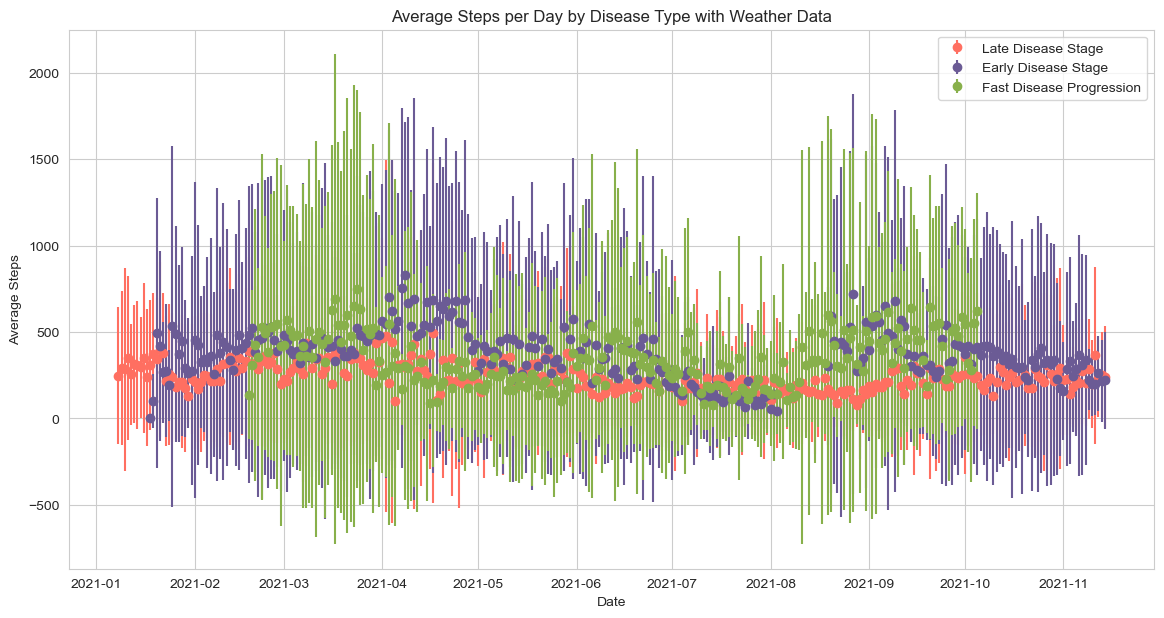

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the overview CSV
overview_df = pd.read_csv('../ClinicalMarkers_final.csv')

# Create a list to store data for each participant
participant_data = []

# Read each participant's hourly sensor data
for _, row in overview_df.iterrows():
    participant_id = row['Id']
    disease_type = row['disease_type']
    filename = f'../Hourly Sensor Data/RHourly_{participant_id}.csv'
    if os.path.exists(filename):
        data = pd.read_csv(filename, parse_dates=['time'])
        data['disease_type'] = disease_type
        data['participant_id'] = participant_id
        participant_data.append(data)

# Concatenate all dataframes into a single dataframe
all_data = pd.concat(participant_data)

# Extract the date from the time column
all_data['date'] = all_data['time'].dt.date

# Group by disease type and date, then calculate mean trends
grouped = all_data.groupby(['disease_type', 'date'])

# Calculate mean, std, and count
daily_data = grouped.agg({
    'steps': ['mean', 'std', 'count'],
    'sleep': ['mean', 'std', 'count'],
    'heartrate': ['mean', 'std', 'count']
}).reset_index()

# Flatten MultiIndex columns
daily_data.columns = ['disease_type', 'date', 'steps_mean', 'steps_std', 'steps_count', 'sleep_mean', 'sleep_std', 'sleep_count', 'heartrate_mean', 'heartrate_std', 'heartrate_count']

# Read the daily weather CSV file
weather_df = pd.read_csv('zurich_weather_daily.csv')

# Convert the 'date' column to datetime
weather_df['date'] = pd.to_datetime(weather_df['date']).dt.date

# Merge the daily_data with the weather data
merged_data = pd.merge(daily_data, weather_df, on='date')

# Display the merged data
print("Merged Data:")
print(merged_data.head())

# Plotting example: Steps vs Temperature
plt.figure(figsize=(14, 7))
colors = {
    'Late Disease Stage': '#FF6F61',  # Coral
    'Early Disease Stage': '#6B5B95',  # Royal purple
    'Fast Disease Progression': '#88B04B'  # Olive green
}
for disease_type, color in colors.items():
    subset = merged_data[merged_data['disease_type'] == disease_type]
    plt.errorbar(subset['date'], subset['steps_mean'], yerr=subset['steps_std'], label=disease_type, fmt='o', color=color)

plt.title('Average Steps per Day by Disease Type with Weather Data')
plt.xlabel('Date')
plt.ylabel('Average Steps')
plt.legend()
plt.grid(True)
plt.show()


/var/folders/d2/nvh7lrhj43bc5s3mjjwk4kxm0000gn/T/ipykernel_70471/2399612742.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['sunshine_duration'] = plot_data['sunshine_duration'] / 3600
/var/folders/d2/nvh7lrhj43bc5s3mjjwk4kxm0000gn/T/ipykernel_70471/2399612742.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data.rename(columns={


Mean Temperature: 10.50 °C, Std Dev: 6.90 °C
Mean Sunlight: 8.34 hours, Std Dev: 4.09 hours
Mean Precipitation: 3.58 mm, Std Dev: 5.98 mm


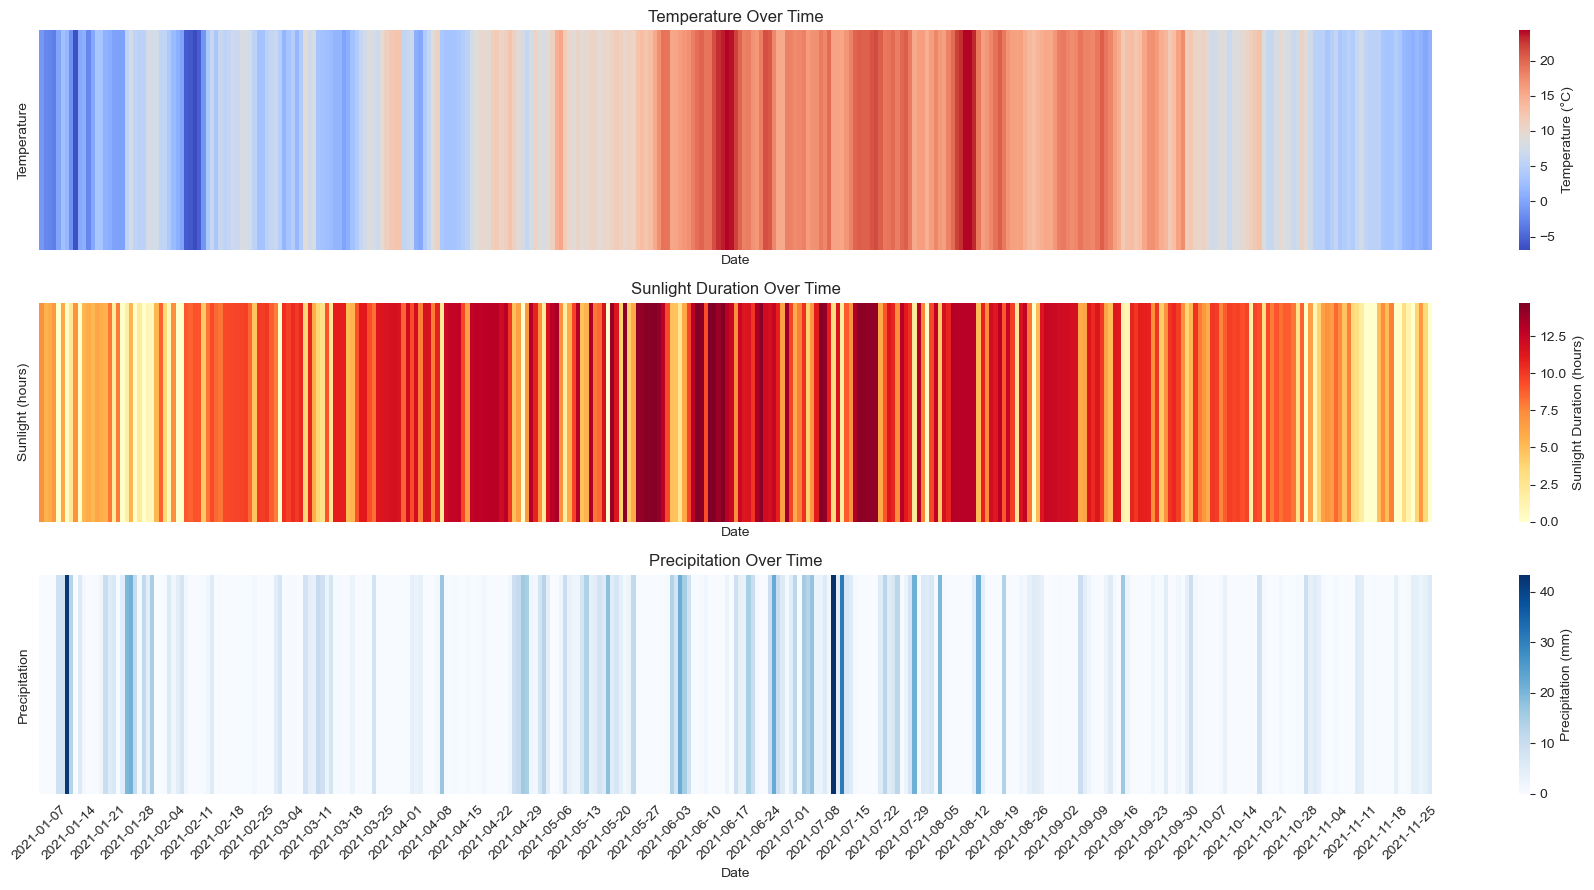

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the daily weather CSV file
weather_df = pd.read_csv('zurich_weather_daily.csv')

# Convert the 'date' column to datetime
weather_df['date'] = pd.to_datetime(weather_df['date'])

# Set the date as the index for plotting
weather_df.set_index('date', inplace=True)

# Select only the required columns
plot_data = weather_df[['temperature_2m_mean', 'sunshine_duration', 'precipitation_sum']]

# Convert sunshine_duration from seconds to hours
plot_data['sunshine_duration'] = plot_data['sunshine_duration'] / 3600

# Rename columns for better readability in the plot
plot_data.rename(columns={
    'temperature_2m_mean': 'Temperature',
    'sunshine_duration': 'Sunlight (hours)',
    'precipitation_sum': 'Precipitation'
}, inplace=True)

# Compute the mean and standard deviation for each column
mean_temperature = plot_data['Temperature'].mean()
std_temperature = plot_data['Temperature'].std()

mean_sunlight = plot_data['Sunlight (hours)'].mean()
std_sunlight = plot_data['Sunlight (hours)'].std()

mean_precipitation = plot_data['Precipitation'].mean()
std_precipitation = plot_data['Precipitation'].std()

# Print the computed statistics
print(f'Mean Temperature: {mean_temperature:.2f} °C, Std Dev: {std_temperature:.2f} °C')
print(f'Mean Sunlight: {mean_sunlight:.2f} hours, Std Dev: {std_sunlight:.2f} hours')
print(f'Mean Precipitation: {mean_precipitation:.2f} mm, Std Dev: {std_precipitation:.2f} mm')

# Plotting
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(18, 9), sharex=True)

# Temperature heatmap
sns.heatmap(plot_data[['Temperature']].T, cmap='coolwarm', ax=axs[0], cbar_kws={'label': 'Temperature (°C)'})
axs[0].set_title('Temperature Over Time')

# Sunlight heatmap
sns.heatmap(plot_data[['Sunlight (hours)']].T, cmap='YlOrRd', ax=axs[1], cbar_kws={'label': 'Sunlight Duration (hours)'})
axs[1].set_title('Sunlight Duration Over Time')

# Precipitation heatmap
sns.heatmap(plot_data[['Precipitation']].T, cmap='Blues', ax=axs[2], cbar_kws={'label': 'Precipitation (mm)'})
axs[2].set_title('Precipitation Over Time')

# Customize the plot
for ax in axs:
    ax.set_xlabel('Date')
    ax.set_ylabel('')
    # Set x-ticks every 7 days
    ax.set_xticks(range(0, len(plot_data.index), 7))
    ax.set_xticklabels(plot_data.index[::7].strftime('%Y-%m-%d'), rotation=45)

plt.tight_layout()
plt.show()


In [23]:
weather_df

,date,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,sunrise,sunset,daylight_duration,sunshine_duration,precipitation_sum,wind_speed_10m_max
0,2021-01-07,3.0,1.7775,-3.5225,-1.185000,0,0,31297.434,25525.607,0.000000,7.517021
1,2021-01-08,3.0,0.8275,-5.3225,-2.507917,0,0,31389.322,19588.705,0.000000,16.641972
2,2021-01-09,3.0,-0.7725,-4.3225,-2.645417,0,0,31486.535,21132.387,0.000000,15.379206
3,2021-01-10,3.0,-1.7225,-4.6725,-3.212083,0,0,31588.842,24357.156,0.000000,9.339208
4,2021-01-11,73.0,2.5275,-4.5225,-0.076667,0,0,31696.014,0.000,8.900001,22.366402
...,...,...,...,...,...,...,...,...,...,...,...
322,2021-11-25,73.0,1.7275,0.6275,1.052500,0,0,32071.186,0.000,4.100000,12.074766
323,2021-11-26,75.0,5.1775,-0.3725,1.829583,0,0,31954.290,14053.246,3.900000,12.240000
324,2021-11-27,73.0,3.4275,-0.4725,1.283750,0,0,31840.566,24892.727,2.700000,12.429127
325,2021-11-28,73.0,1.6775,-0.8225,0.321250,0,0,31730.182,12957.812,3.800000,13.854155


In [24]:
merged_data

,disease_type,date,steps_mean,steps_std,steps_count,sleep_mean,sleep_std,sleep_count,heartrate_mean,heartrate_std,...,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,sunrise,sunset,daylight_duration,sunshine_duration,precipitation_sum,wind_speed_10m_max
0,Early Disease Stage,2021-01-18,0.000000,0.000000,24,0.000000,0.000000,24,NaN,NaN,...,3.0,3.1775,-8.1225,-2.537083,0,0,32563.635,20997.060,0.000000,9.693296
1,Late Disease Stage,2021-01-18,307.838888,377.841567,24,17.208333,27.427341,24,77.375573,10.410499,...,3.0,3.1775,-8.1225,-2.537083,0,0,32563.635,20997.060,0.000000,9.693296
2,Early Disease Stage,2021-01-19,99.836756,155.941682,24,0.791667,3.878359,24,82.888601,5.561212,...,3.0,6.3275,-5.9225,0.242083,0,0,32701.746,19204.229,0.000000,11.792404
3,Late Disease Stage,2021-01-19,373.392978,353.357704,24,13.666667,24.804745,24,80.852071,14.491889,...,3.0,6.3275,-5.9225,0.242083,0,0,32701.746,19204.229,0.000000,11.792404
4,Early Disease Stage,2021-01-20,492.163908,781.637098,24,20.083333,27.615239,24,84.917743,16.077801,...,3.0,6.8775,0.0275,3.377500,0,0,32842.760,22364.033,0.000000,11.246759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,Late Disease Stage,2021-01-13,316.566664,341.926080,24,15.458333,26.363643,24,81.454784,9.741770,...,75.0,4.5275,-0.5225,1.835833,0,0,31924.045,0.000,42.100002,26.544964
823,Late Disease Stage,2021-01-14,311.135141,369.928026,24,19.625000,27.534662,24,82.064062,13.914228,...,75.0,-0.3725,-4.6725,-1.843334,0,0,32044.459,8859.664,13.200000,11.119281
824,Late Disease Stage,2021-01-15,297.017902,291.910804,24,15.458333,26.363643,24,80.994169,10.962268,...,71.0,-3.3225,-10.7725,-6.516250,0,0,32168.838,25334.799,0.100000,7.208994
825,Late Disease Stage,2021-01-16,348.153114,433.507578,24,12.208333,22.374246,24,81.602312,12.351939,...,73.0,2.0775,-3.7225,0.392083,0,0,32296.973,0.000,6.100000,19.416653


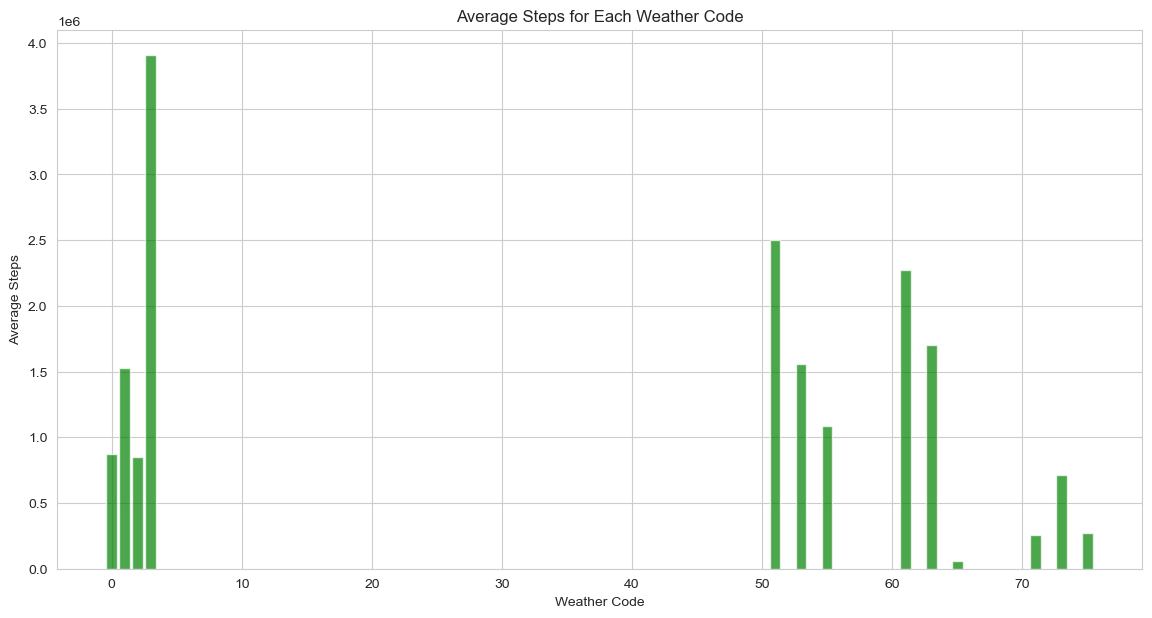

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the overview CSV
overview_df = pd.read_csv('../ClinicalMarkers_final.csv')

# Create a list to store data for each participant
participant_data = []

# Read each participant's hourly sensor data
for _, row in overview_df.iterrows():
    participant_id = row['Id']
    disease_type = row['disease_type']
    filename = f'../Hourly Sensor Data/RHourly_{participant_id}.csv'
    if os.path.exists(filename):
        data = pd.read_csv(filename, parse_dates=['time'])
        data['disease_type'] = disease_type
        data['participant_id'] = participant_id
        participant_data.append(data)

# Concatenate all dataframes into a single dataframe
all_data = pd.concat(participant_data)

# Extract the date from the time column
all_data['date'] = all_data['time'].dt.date

# Read the daily weather CSV file
weather_df = pd.read_csv('zurich_weather_daily.csv')

# Convert the 'date' column to datetime
weather_df['date'] = pd.to_datetime(weather_df['date']).dt.date

# Merge the all_data with the weather data
merged_data = pd.merge(all_data, weather_df, on='date')

# Group by weather code and calculate mean steps
weather_grouped = merged_data.groupby('weather_code').agg({'steps': 'sum'}).reset_index()

# Plotting mean steps for each weather code
plt.figure(figsize=(14, 7))
plt.bar(weather_grouped['weather_code'], weather_grouped['steps'], color='green', alpha=0.7)

plt.xlabel('Weather Code')
plt.ylabel('Average Steps')
plt.title('Average Steps for Each Weather Code')
plt.grid(True)
plt.show()


In [44]:
merged_data['weather_code']

0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
57923    3.0
57924    3.0
57925    3.0
57926    3.0
57927    3.0
Name: weather_code, Length: 57928, dtype: float64

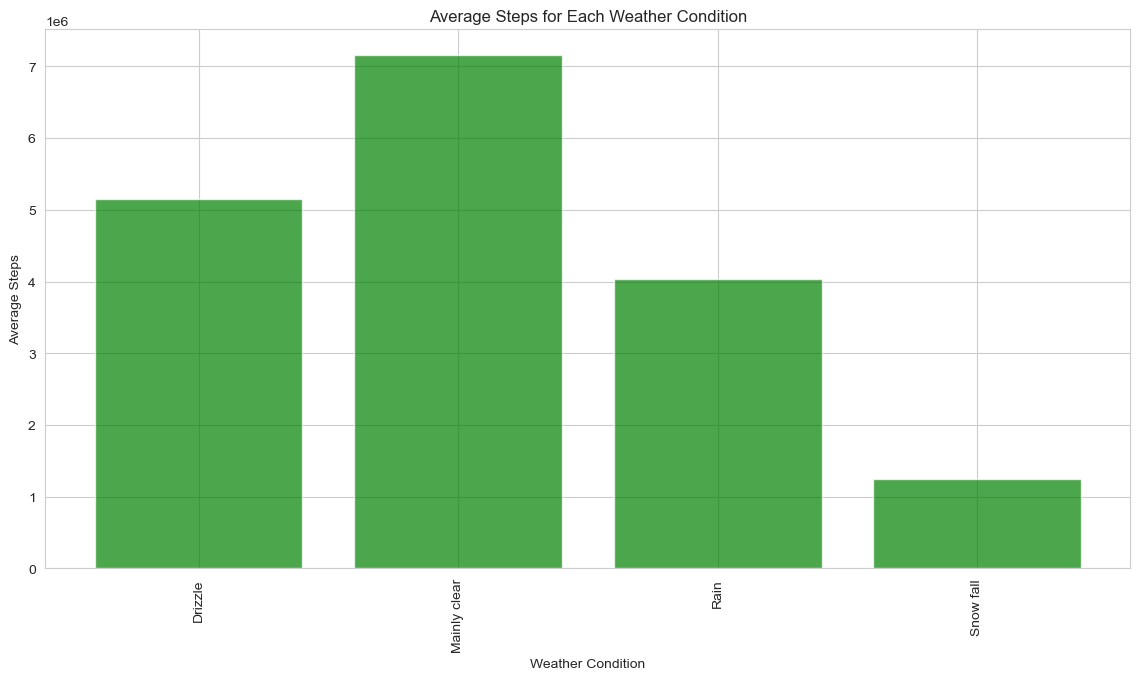

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the overview CSV
overview_df = pd.read_csv('../ClinicalMarkers_final.csv')

# Create a list to store data for each participant
participant_data = []

# Read each participant's hourly sensor data
for _, row in overview_df.iterrows():
    participant_id = row['Id']
    disease_type = row['disease_type']
    filename = f'../Hourly Sensor Data/RHourly_{participant_id}.csv'
    if os.path.exists(filename):
        data = pd.read_csv(filename, parse_dates=['time'])
        data['disease_type'] = disease_type
        data['participant_id'] = participant_id
        participant_data.append(data)

# Concatenate all dataframes into a single dataframe
all_data = pd.concat(participant_data)

# Extract the date from the time column
all_data['date'] = all_data['time'].dt.date

# Read the daily weather CSV file
weather_df = pd.read_csv('zurich_weather_daily.csv')

# Convert the 'date' column to datetime
weather_df['date'] = pd.to_datetime(weather_df['date']).dt.date

# Merge the all_data with the weather data
merged_data = pd.merge(all_data, weather_df, on='date')

# Define weather code labels
weather_code_labels = {
    0: 'Mainly clear',
    1: 'Mainly clear',
    2: 'Mainly clear',
    3: 'Mainly clear',
    45: 'Fog and depositing rime fog',
    48: 'Fog and depositing rime fog',
    51: 'Drizzle',
    53: 'Drizzle',
    55: 'Drizzle',
    56: 'Drizzle',
    57: 'Drizzle',
    61: 'Rain',
    63: 'Rain',
    65: 'Rain',
    66: 'Rain',
    67: 'Rain',
    71: 'Snow fall',
    73: 'Snow fall',
    75: 'Snow fall',
    77: 'Snow grains',
    80: 'Rain showers: Slight, moderate, and violent',
    81: 'Rain showers: Slight, moderate, and violent',
    82: 'Rain showers: Slight, moderate, and violent',
    85: 'Snow showers slight and heavy',
    86: 'Snow showers slight and heavy',
    95: 'Thunderstorm: Slight or moderate',
    96: 'Thunderstorm with slight and heavy hail',
    99: 'Thunderstorm with slight and heavy hail'
}

# Map weather codes to labels
merged_data['weather_label'] = merged_data['weather_code'].map(weather_code_labels)

# Drop rows with weather codes not in the provided table
merged_data = merged_data.dropna(subset=['weather_label'])
merged_data = merged_data.dropna(subset=['heartrate'])

# Group by weather label and calculate mean steps
weather_grouped = merged_data.groupby('weather_label').agg({'steps': 'sum'}).reset_index()

# Plotting mean steps for each weather label
plt.figure(figsize=(14, 7))
plt.bar(weather_grouped['weather_label'], weather_grouped['steps'], color='green', alpha=0.7)

plt.xlabel('Weather Condition')
plt.ylabel('Average Steps')
plt.title('Average Steps for Each Weather Condition')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


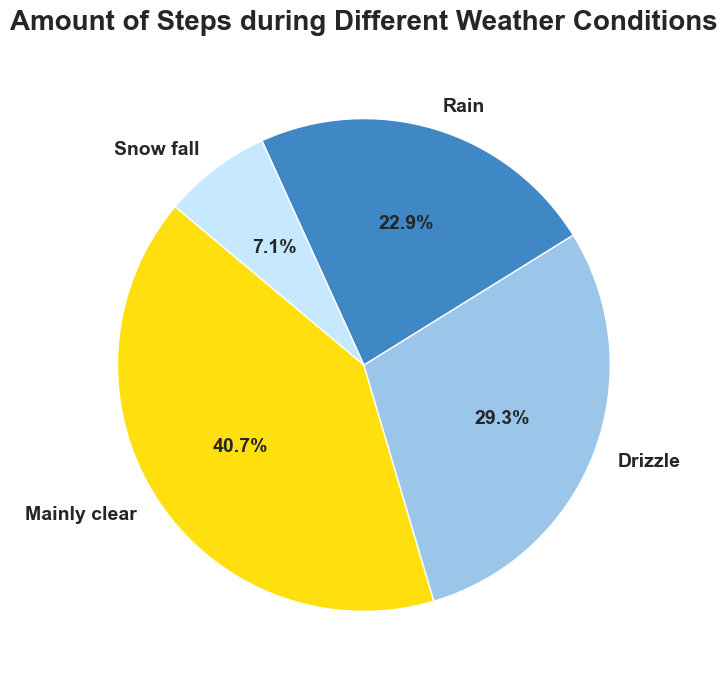

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the overview CSV
overview_df = pd.read_csv('../ClinicalMarkers_final.csv')

# Create a list to store data for each participant
participant_data = []

# Read each participant's hourly sensor data
for _, row in overview_df.iterrows():
    participant_id = row['Id']
    disease_type = row['disease_type']
    filename = f'../Hourly Sensor Data/RHourly_{participant_id}.csv'
    if os.path.exists(filename):
        data = pd.read_csv(filename, parse_dates=['time'])
        data['disease_type'] = disease_type
        data['participant_id'] = participant_id
        participant_data.append(data)

# Concatenate all dataframes into a single dataframe
all_data = pd.concat(participant_data)

# Extract the date from the time column
all_data['date'] = all_data['time'].dt.date

# Read the daily weather CSV file
weather_df = pd.read_csv('zurich_weather_daily.csv')

# Convert the 'date' column to datetime
weather_df['date'] = pd.to_datetime(weather_df['date']).dt.date

# Merge the all_data with the weather data
merged_data = pd.merge(all_data, weather_df, on='date')

# Define weather code labels
weather_code_labels = {
    0: 'Mainly clear',
    1: 'Mainly clear',
    2: 'Mainly clear',
    3: 'Mainly clear',
    45: 'Fog and depositing rime fog',
    48: 'Fog and depositing rime fog',
    51: 'Drizzle',
    53: 'Drizzle',
    55: 'Drizzle',
    56: 'Drizzle',
    57: 'Drizzle',
    61: 'Rain',
    63: 'Rain',
    65: 'Rain',
    66: 'Rain',
    67: 'Rain',
    71: 'Snow fall',
    73: 'Snow fall',
    75: 'Snow fall',
    77: 'Snow grains',
    80: 'Rain showers: Slight, moderate, and violent',
    81: 'Rain showers: Slight, moderate, and violent',
    82: 'Rain showers: Slight, moderate, and violent',
    85: 'Snow showers slight and heavy',
    86: 'Snow showers slight and heavy',
    95: 'Thunderstorm: Slight or moderate',
    96: 'Thunderstorm with slight and heavy hail',
    99: 'Thunderstorm with slight and heavy hail'
}

# Map weather codes to labels
merged_data['weather_label'] = merged_data['weather_code'].map(weather_code_labels)

# Drop rows with weather codes not in the provided table
merged_data = merged_data.dropna(subset=['weather_label'])
merged_data = merged_data.dropna(subset=['heartrate'])

# Group by weather label and calculate sum of steps
weather_grouped = merged_data.groupby('weather_label').agg({'steps': 'sum'}).reset_index()

# Sort by steps to ensure the largest slices come first
weather_grouped = weather_grouped.sort_values(by='steps', ascending=False)

# Define colors for the pie chart
colors = {
    'Mainly clear': '#FFDF0D',
    'Drizzle': '#9CC6E9',
    'Rain': '#3F88C5',
    'Snow fall': '#C6E9FF',
    'Fog and depositing rime fog': '#A9A9A9',
    'Snow grains': '#ADD8E6',
    'Rain showers: Slight, moderate, and violent': '#87CEEB',
    'Snow showers slight and heavy': '#B0E0E6',
    'Thunderstorm: Slight or moderate': '#4682B4',
    'Thunderstorm with slight and heavy hail': '#1E90FF'
}

# Map the colors to the weather labels
weather_grouped['color'] = weather_grouped['weather_label'].map(colors)

# Plotting sum of steps for each weather label as a pie chart
plt.figure(figsize=(12, 8))
plt.pie(
    weather_grouped['steps'], 
    labels=weather_grouped['weather_label'], 
    colors=weather_grouped['color'], 
    autopct='%1.1f%%', 
    startangle=140,
    textprops={'fontsize': 14, 'weight': 'bold'}
)

plt.title('Amount of Steps during Different Weather Conditions', fontsize=20, weight='bold', pad=20)
plt.show()


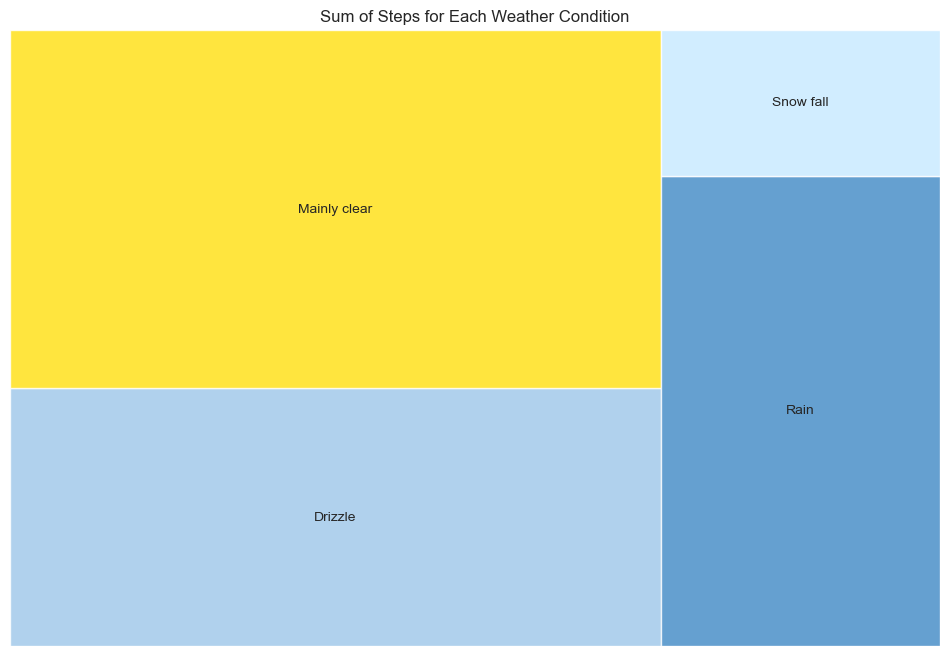

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import squarify

# Load the overview CSV
overview_df = pd.read_csv('../ClinicalMarkers_final.csv')

# Create a list to store data for each participant
participant_data = []

# Read each participant's hourly sensor data
for _, row in overview_df.iterrows():
    participant_id = row['Id']
    disease_type = row['disease_type']
    filename = f'../Hourly Sensor Data/RHourly_{participant_id}.csv'
    if os.path.exists(filename):
        data = pd.read_csv(filename, parse_dates=['time'])
        data['disease_type'] = disease_type
        data['participant_id'] = participant_id
        participant_data.append(data)

# Concatenate all dataframes into a single dataframe
all_data = pd.concat(participant_data)

# Extract the date from the time column
all_data['date'] = all_data['time'].dt.date

# Read the daily weather CSV file
weather_df = pd.read_csv('zurich_weather_daily.csv')

# Convert the 'date' column to datetime
weather_df['date'] = pd.to_datetime(weather_df['date']).dt.date

# Merge the all_data with the weather data
merged_data = pd.merge(all_data, weather_df, on='date')

# Define weather code labels
weather_code_labels = {
    0: 'Mainly clear',
    1: 'Mainly clear',
    2: 'Mainly clear',
    3: 'Mainly clear',
    45: 'Fog and depositing rime fog',
    48: 'Fog and depositing rime fog',
    51: 'Drizzle',
    53: 'Drizzle',
    55: 'Drizzle',
    56: 'Drizzle',
    57: 'Drizzle',
    61: 'Rain',
    63: 'Rain',
    65: 'Rain',
    66: 'Rain',
    67: 'Rain',
    71: 'Snow fall',
    73: 'Snow fall',
    75: 'Snow fall',
    77: 'Snow grains',
    80: 'Rain showers: Slight, moderate, and violent',
    81: 'Rain showers: Slight, moderate, and violent',
    82: 'Rain showers: Slight, moderate, and violent',
    85: 'Snow showers slight and heavy',
    86: 'Snow showers slight and heavy',
    95: 'Thunderstorm: Slight or moderate',
    96: 'Thunderstorm with slight and heavy hail',
    99: 'Thunderstorm with slight and heavy hail'
}

# Map weather codes to labels
merged_data['weather_label'] = merged_data['weather_code'].map(weather_code_labels)

# Drop rows with weather codes not in the provided table
merged_data = merged_data.dropna(subset=['weather_label'])
merged_data = merged_data.dropna(subset=['heartrate'])

# Group by weather label and calculate sum of steps
weather_grouped = merged_data.groupby('weather_label').agg({'steps': 'sum'}).reset_index()

# Define colors for the Treemap chart
colors = {
    'Mainly clear': '#FFDF0D',
    'Drizzle': '#9CC6E9',
    'Rain': '#3F88C5',
    'Snow fall': '#C6E9FF',
}

# Map the colors to the weather labels
weather_grouped['color'] = weather_grouped['weather_label'].map(colors)

# Plotting sum of steps for each weather label as a Treemap chart
plt.figure(figsize=(12, 8))
squarify.plot(sizes=weather_grouped['steps'], label=weather_grouped['weather_label'], color=weather_grouped['color'], alpha=0.8)
plt.title('Sum of Steps for Each Weather Condition')
plt.axis('off')
plt.show()
